<a href="https://colab.research.google.com/github/MacsEli/DocumentosDeClase/blob/main/Supervised_Classificacion_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arboles
**Bagging**
(Bootstrap aggregation) Permite seleccionar de neustro mismos dataset diferentes subsets para entrenar neustro algoritmo. Ayuda a prevenir el Overfitting y mejora la estabilidad de neustros algoritmos a tener en cuenta diferentes muestras que contienen datos similares con reemplazo


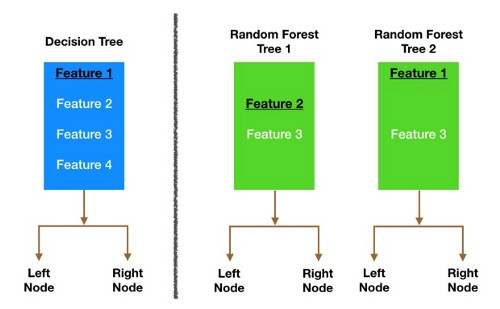

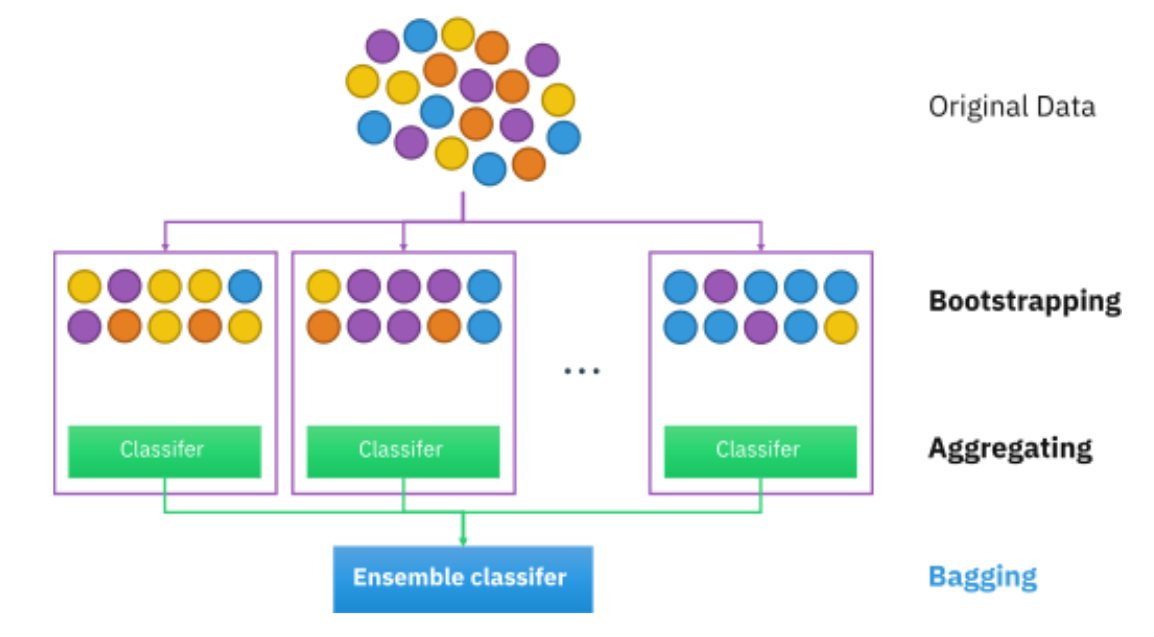

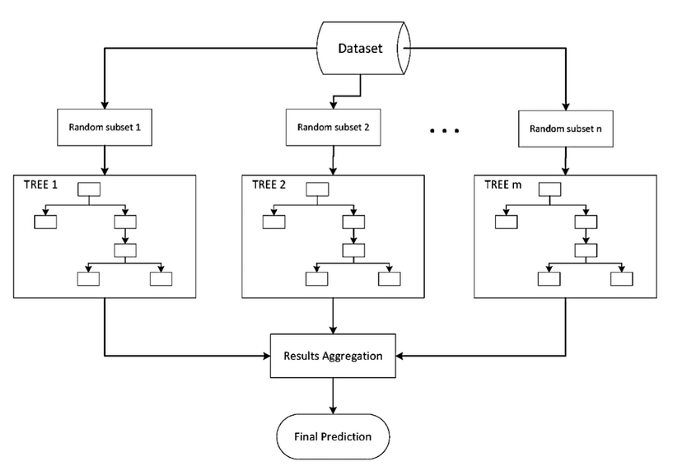

Ejemplos
* Para forecastear resultados y asignar probabilidades a cada uno
* Aprobación de crédito

In [ ]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importamos nuestro dataset
input_file='/content/drive/MyDrive/Databases/Week 18/data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:,:-1], data[:,-1]

In [ ]:
#Separar nuestras label de clases
#Clase 0 son los que fueron aprobados
class_0 = np.array(X[y==0])
#Clase 1 son los que fueron rechazados
class_1 = np.array(X[y==1])

Text(0.5, 1.0, 'Input data')

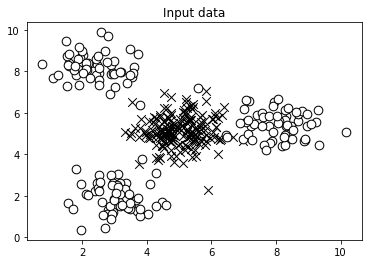

In [ ]:
fig = plt.figure(facecolor='w')
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
        edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
        edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=5)

In [ ]:
params={'random_state':0,'max_depth':4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#DEFINIR UN VISUALIZADOR PARA NUESTROS ALGORITMOS

def visualize_classifier(classifier, X, y, title=''):
  #obteniendo nuestro min y max para el arange
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    
    # paso que tomara nuestro grid
    mesh_step_size = 0.01
    
    # Define the mesh grid of X and Y values
    #manera automatica de crear un grid para nuestro rango de datos
    #x_vals convierte nustro arreglo de 2D en uno de 1D,
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))
    
    #Ejecutando neustro modelo para los valores
    #Ravel permite convertir el arerglo a 1 D
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    
    # Cambiamos el tamoño de nuestro output 
    output = output.reshape(x_vals.shape)
    
    # Create a plot
    plt.figure()
    
    # Specify the title
    plt.title(title)
    
    # Creamos el color de nustra grafica. Practicamente es estar mapeando los limites de donde a donde
    #va a colorear y los colores o escalara de colores la determinamos en cmap
    # Colores secuenciales, divergentes, etc...
    #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.hot)
    
    # Crea un scatterplot con cada valor de X y y, color del marker
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    
    # Especigicamos de donde a donde va nuestro plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    
    # Especificamos marcador en nuestro eje x y y.
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    
    plt.show()


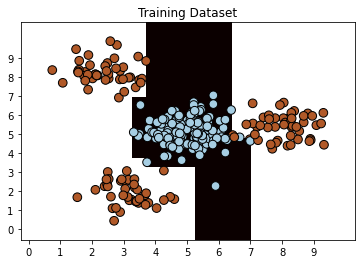

In [ ]:
#Lo que cae
visualize_classifier(classifier,X_train,y_train,'Training Dataset')

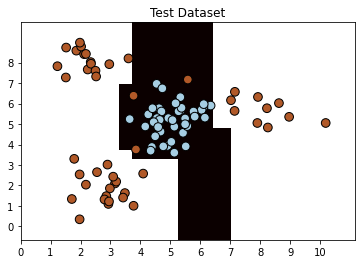

In [ ]:
#visualizar el dataset de prueba
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier,X_test,y_test,'Test Dataset')

In [ ]:
#Metricas del arbol de decisión
class_names = ['Class-0','Class-1']
print('\n')
print('\n'+"*"*40)
print('\n Classifier performance on Training dataset\n')
print(classification_report(y_train,classifier.predict(X_train),target_names=class_names))
print('\n'+"*"*40)
print('\n Classifier performance on Test dataset\n')
print(classification_report(y_test,y_test_pred,target_names=class_names))

#Precisision: Verdaderos positivos, porcentaje de datos que fueron correctamente predichos
# Recall: Cuantos items de los que seleccionaste fueron importantes y que realmente pertenecen a la clase
#f1 score: pondera ambos, Se usa cuando nos interesa tanto precission como recall
#f1 es 0, significa que tu entrenamiento fue un desastre
#fe es 1, fue muy acertado

#clase 0 aproibados
#clase 1 rechazados





****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270


****************************************

 Classifier performance on Test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



In [ ]:
#Confusion matrix 
y_pred_confussion = classifier.predict(X_test)
confusion_matrix(y_test,y_pred_confussion)

array([[43,  0],
       [ 3, 44]])

In [ ]:
#AUC (area under the curve)

y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr)
auc

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20), facecolor='w')
tree.plot_tree(classifier,
               filled = True);


##Random FOrest Classifier
Es bueno cuando la interpretabilidad del arbol no es una gran preocupación.Random Foest lo debemos usar cuando tenemos un dataset grande.

In [ ]:
#Importamos RandomFores
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Importamos datos
input_file = '/content/drive/MyDrive/Databases/Week 18/data_random_forests.txt'
data = np.loadtxt(input_file,delimiter=',')
X, y = data[:,:-1],data[:,-1]

In [ ]:
#Aprobacion del credito
aprobados = np.array(X[y==0])
rechazados = np.array(X[y==1])
mas_info = np.array(X[y==2])

Text(0.5, 1.0, 'Input_data')

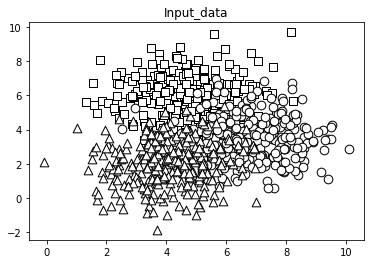

In [ ]:
plt.figure()
plt.scatter(aprobados[:,0],aprobados[:,1],s=75,facecolors='white',edgecolor='black',linewidth=1,marker='s')
plt.scatter(rechazados[:,0],rechazados[:,1],s=75,facecolors='white',edgecolor='black',linewidth=1,marker='o')
plt.scatter(mas_info[:,0],mas_info[:,1],s=75,facecolors='white',edgecolor='black',linewidth=1,marker='^')
plt.title('Input_data')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=5)

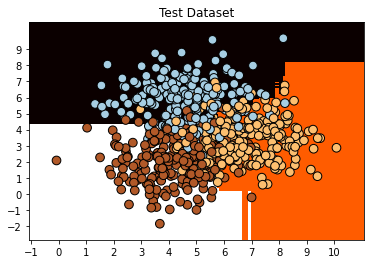

In [ ]:
#Estimatores son arboles 
# max_depth=4 es profundidad
classifier= RandomForestClassifier(n_estimators=100,max_depth=4, random_state=0)
classifier.fit(X_train, y_train)
visualize_classifier(classifier,X_train,y_train,'Test Dataset')

In [ ]:
y_test_pred = classifier.predict(X_test)
class_names = ['Aprobados','Rechazados','Mas info']
print('\n')
print('\n'+"*"*40)
print('\n Classifier performance on Training dataset\n')
print(classification_report(y_train,classifier.predict(X_train),target_names=class_names))
print('\n'+"*"*40)
print('\n Classifier performance on Test dataset\n')
print(classification_report(y_test,y_test_pred,target_names=class_names))





****************************************

 Classifier performance on Training dataset

              precision    recall  f1-score   support

   Aprobados       0.91      0.86      0.88       221
  Rechazados       0.84      0.87      0.86       230
    Mas info       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675


****************************************

 Classifier performance on Test dataset

              precision    recall  f1-score   support

   Aprobados       0.92      0.85      0.88        79
  Rechazados       0.86      0.84      0.85        70
    Mas info       0.84      0.92      0.88        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225



#KNN (K- Narest Neighbor)



1.   Calcular la distancia entre el item a clasificar y el resto de items del DS
de entrenamient
2.   Selecciona los k elemenots con menor distancia
3. Raliza una "votación" de aquellos que más se acerquen. Los de una clase que
dominen decidiran el resultado

Las formas más populares de “medir la cercanía” entre puntos son la distancia Euclidiana (la “de siempre”) o la Cosine Similarity

Como pros tiene sobre todo que es sencillo de aprender e implementar. Tiene como contras que utiliza todo el dataset para entrenar “cada punto” y por eso requiere de uso de mucha memoria y recursos de procesamiento (CPU). 

Por estas razones kNN tiende a funcionar mejor en datasets pequeños y sin una cantidad enorme de features 

Posibles caso de uso

 * sistemas de recomendación
 * búsqueda semántica 
 * detección de anomalías.

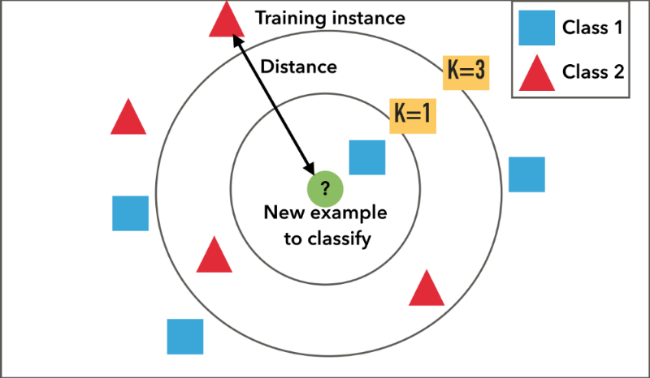

In [ ]:
import matplotlib.cm as cm
from sklearn import neighbors, datasets

In [ ]:
input_file = '/content/drive/MyDrive/Databases/Week 18/data.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:,:-1], data[:,-1].astype(np.int)

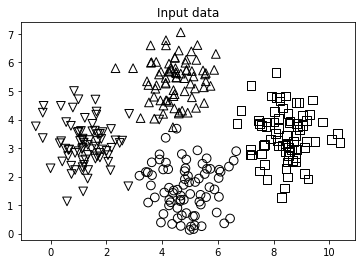

In [ ]:
plt.figure()
plt.title('Input data')
marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y]
for i in range(X.shape[0]):
  plt.scatter(X[i,0],X[i,1],marker=mapper[i],
              s=75, edgecolors='black',facecolors='none')

In [ ]:
num_neighbors = 12
#Uniforme = Cada vecino tiene el mismo peso
#Distancia = Los vecinos mas cercanos tienen más peso

classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')
classifier.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='distance')

In [ ]:
step_size = .1
#Definir los limites de nuestro "Lienzo de grafica"
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size))

In [ ]:
#Evaluar nuestro classifier
output = classifier.predict(np.c_[x_values.ravel(),y_values.ravel()])

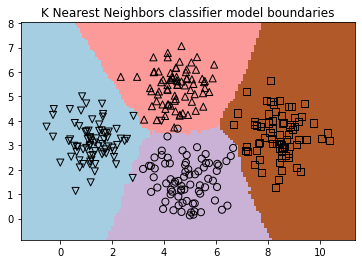

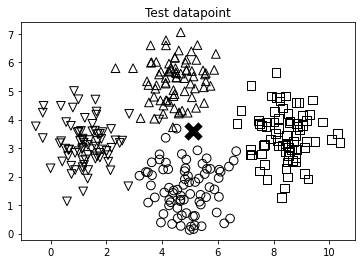

In [ ]:
# Vamos a ver como le fue a nuestro clasificador
output = output.reshape(x_values.shape)
plt.figure()

plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)
# Overlay the training points on the map
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')

# plt.xlim(x_values.min(), x_values.max())
# plt.ylim(y_values.min(), y_values.max())
plt.title('K Nearest Neighbors classifier model boundaries')

# Generando uno de prueba
test_datapoint = [5.1, 3.6]
plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=6, s=200, facecolors='black')

In [ ]:
test_datapoint =[10,1]
classifier.predict([test_datapoint])

array([3])

#SVM
Las Máquinas de Vectores de Soporte (Support Vector Machines) permiten encontrar la forma óptima de clasificar entre varias clases. La clasificación óptima se realiza maximizando el margen de separación entre las clases. 

Este margen siempre se intenta que sea el maximo para que no se calsifique incorercamtente

Los vectores que definen el borde de esta separación son los vectores de soporte. En el caso de que las clases no sean linealmente separables, podemos usar el truco del kernel para añadir una dimensión nueva donde sí lo sean.

Uso de SVM:

* reconocimiento óptico de caracteres
* detección de caras para que las cámaras digitales enfoquen correctamente
* filtros de spam para correo electrónico
* reconocimiento de imágenes a bordo de satélites (saber qué partes de una imagen tienen nubes, tierra, agua, hielo, etc.)
* Actualmente, las redes neuronales profundas tienen una mayor capacidad de aprendizaje y generalización que los SVM.


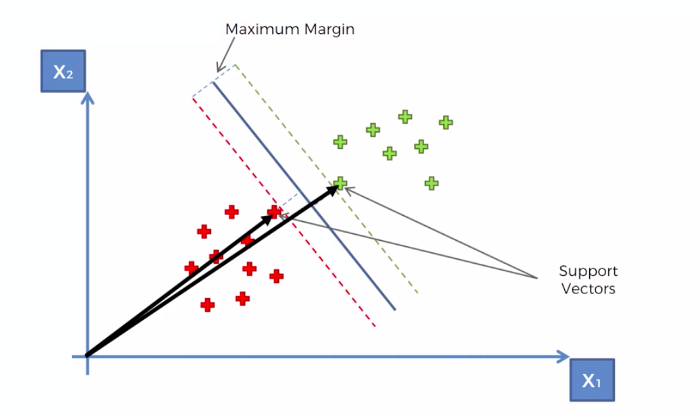

## Truco de Kernel
Hay veces en las que no hay forma de encontrar una hiperplano que permita separar dos clases. En estos casos decimos que las clases no son linealmente separables. Para resolver este problema podemos usar el truco del kernel.

El truco del kernel consiste en inventar una dimensión nueva en la que podamos encontrar un hiperplano para separar las clases. En la siguiente figura vemos cómo al añadir una dimensión nueva, podemos separar fácilmente las dos clases con una superficie de decisión.

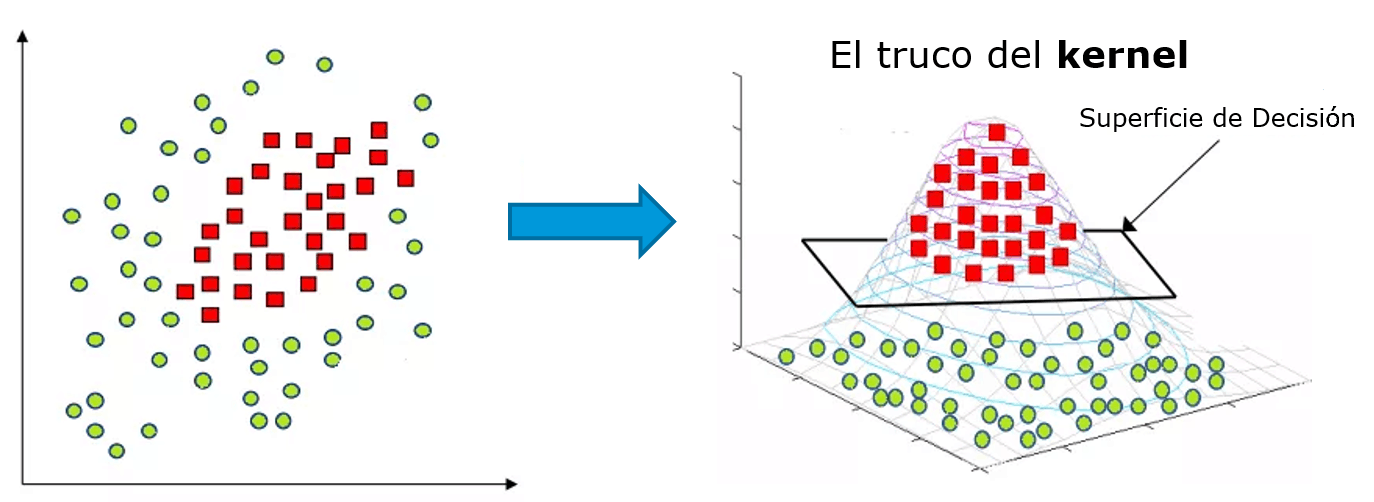

In [ ]:
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
#Importamos neustros datos
input_file = '/content/drive/MyDrive/Databases/Week 18/income_data.txt'

In [ ]:
# Definimos arrays vacios
X = []
y = []
# Definimos conteo de clases a 0
count_class1 = 0
count_class2 = 0
# Agregamos limite para nuestro SVM
max_datapoints = 25000

with open(input_file, 'r') as f:
  # Va layendo linea por linea nuestro test file
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break
        # Si tiene un signo de interrogaciòn, regresamos al loop y omitimos valor
        if '?' in line:
            continue
            
        data = line[:-1].split(', ')        
        # Le vamos diciendo A cual pertenece, le damos una clase y lo agregamos al array
        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1

        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1
X = np.array(X)

In [ ]:
#Usar un Label Encoder para neustras variables categoricas
label_encoder = [] 
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    if item.isdigit(): 
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])
#Separacion de etiqueta y datos
X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

In [ ]:
#Generar nuestra dataset de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=5)
#Creamos SVM classifier
#OneVsOne lo que hace es dividir nuestro dataset por sus features y comparar entre ellos
#Class_0 -->class_1
#Class_1
classifier = OneVsOneClassifier(LinearSVC(random_state=0,max_iter=4000))
classifier.fit(X_train,y_train)
y_test_pred=classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#Nuestro accuracy y recall ponderado
f1 = cross_val_score(classifier,X,y, scoring='f1_weighted',cv=3)
f1.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7281562143263254

In [ ]:

input_data = ['37', 'Private', '215646', 'HS-grad', '9', 'Never-married', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', '0', '0', '40', 'United-States']


input_data_encoded = [-1] * len(input_data)

count = 0

for i, item in enumerate(input_data):
  
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count].transform([input_data[i]]))
        count += 1 

input_data_encoded = np.array(input_data_encoded)


In [ ]:
predicted_class = classifier.predict([input_data_encoded])
label_encoder[-1].inverse_transform(predicted_class)

array(['>50K'], dtype='<U26')